<a href="https://colab.research.google.com/github/gnduque/Documentos/blob/main/Estadistica_descriptiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2><font color="#004D7F" size=6>Análisis de datos</font></h2>



<h1><font color="#004D7F" size=5>Estadística descriptiva</font></h1>


In [ ]:
# Permite ajustar la anchura de la parte útil de la libreta (reduce los márgenes)
from IPython.core.display import display, HTML
display(HTML("<style>.container{ width:98% }</style>"))

<a id="section11"></a>
## <font color="#004D7F">1.1. Cargar el conjunto de datos</font>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Librerías
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

In [193]:
estacion= "Belisario"
#"Max_Carapungo"
#"SanAntonio"
#"Tumbaco"
#"Guamani"
#"Cotocollao"
#"Belisario"
#"Centro"
#"LosChillos"
#"ElCamal"

In [211]:
# Path to the CSV file
filename = f'/content/drive/MyDrive/Colab_Notebooks/Curso Python/Datos/Datos_in/{estacion}.csv'

# Read the CSV file
data = pd.read_csv(filename)

# Convert the 'Fecha' column to datetime
data['Fecha'] = pd.to_datetime(data['Fecha'])

# Set 'Fecha' as the index of the DataFrame
data.set_index('Fecha', inplace=True)

# Replace NaN values in the 'AOD' column with 0
data['AOD'] = data['AOD'].fillna(0)

In [212]:
# Eliminar filas con valores NaN
data.dropna(inplace=True)

# Divide the 'AOD' column by 1000
#data['AOD'] = data['AOD'] / 1000

In [213]:
# Filtrar el DataFrame para mantener solo las filas donde 'AOD' no es 0
data = data[data['AOD'] != 0]

Autocorrelación

In [214]:
# Calcular autocorrelación para lag semanal
autocorr_semanal = data['AOD'].autocorr(lag=7)
print(f"Autocorrelación semanal (lag de 7 días): {autocorr_semanal}")

# Calcular autocorrelación para lag mensual
autocorr_mensual = data['AOD'].autocorr(lag=20)  # Ajusta este valor si lo consideras necesario
print(f"Autocorrelación mensual (lag de 20 días): {autocorr_mensual}")

# Calcular autocorrelación para lag trimestral
autocorr_trimestral = data['AOD'].autocorr(lag=90)  # 90 días para un trimestre
print(f"Autocorrelación trimestral (lag de 90 días): {autocorr_trimestral}")

# Calcular autocorrelación para lag anual
autocorr_anual = data['AOD'].autocorr(lag=365)
print(f"Autocorrelación anual (lag de 365 días): {autocorr_anual}")

Autocorrelación semanal (lag de 7 días): 0.14496176383809203
Autocorrelación mensual (lag de 20 días): -0.136595086591325
Autocorrelación trimestral (lag de 90 días): -0.0058843582717957475
Autocorrelación anual (lag de 365 días): -0.081165229809788


<Figure size 3000x600 with 0 Axes>

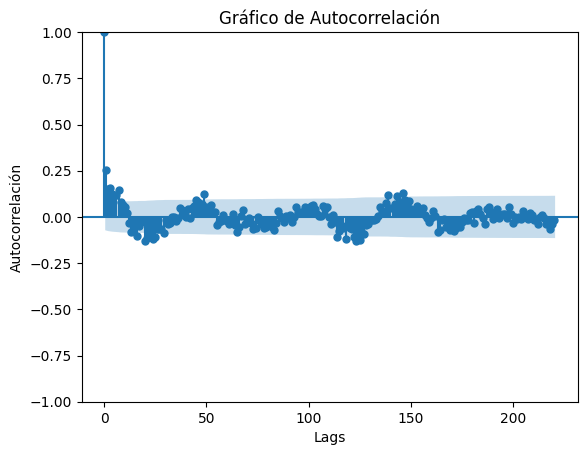

In [215]:
# Graficar la función de autocorrelación
plt.figure(figsize=(30, 6))
plot_acf(data['AOD'], lags=220)  # Ajusta el número de lags según sea necesario
plt.title("Gráfico de Autocorrelación")
plt.xlabel("Lags")
plt.ylabel("Autocorrelación")
plt.show()

Reensample de datos

In [129]:
 data_verano = data[data.index.month.isin([11,12,1])]

In [216]:
#DATOS SEMANALES
# Operations dictionary
operaciones = {
    'NO2': 'max',
    'O3': 'max',
    'PM25': 'max',
    'PRE': 'max',
    'RS': 'max',
    'SO2': 'max',
    'TMP': 'max',
    'VEL': 'max',
    'CO': 'max',
    'DIR': 'max',
    'HUM': 'max',
    'LLU': 'max',
    'AOD': 'max'
}

# Resample the data on a weekly basis
data = data.resample('W').agg(operaciones) #A , M or W

In [217]:
# Eliminar filas con valores NaN
data.dropna(inplace=True)

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section2"></a>
# <font color="#004D7F"> 2. Funciones de estadística descriptiva</font>

<a id="section21"></a>
## <font color="#004D7F">2.1. Revisar los datos: _head()_ </font>

In [128]:
data.head(20)

,O3,PM25,PRE,RS,SO2,TMP,VEL,DIR,HUM,LLU,AOD
Fecha,,,,,,,,,,,
2019-09-23,65.79,36.2,766.87,852.48,4.4,22.56,3.55,140.1350,94.49,0.0,388.0
2019-10-16,58.02,20.0,766.51,852.29,2.4,21.19,4.48,181.3617,93.39,0.4,345.0
2019-11-05,61.98,20.9,764.81,1098.53,3.4,23.12,4.99,154.5233,99.58,0.0,267.0
2019-11-07,55.69,23.5,763.61,1071.34,11.6,23.28,4.20,61.0621,99.66,0.0,342.0
2019-11-09,38.10,18.5,765.00,858.72,2.4,19.60,4.27,115.9125,99.99,0.4,198.0
2019-11-11,33.51,20.5,765.09,746.72,4.0,17.95,2.99,55.2488,99.99,2.2,273.0
2019-11-12,42.44,18.4,764.87,967.35,2.9,19.88,3.43,157.6375,99.11,4.1,287.0
2019-11-25,46.20,26.6,763.47,967.71,4.6,23.06,3.12,114.2417,98.36,0.0,242.0
2019-12-04,28.95,41.2,765.58,962.70,5.0,20.79,4.38,127.8033,96.87,0.8,81.0


<a id="section22"></a>
## <font color="#004D7F">2.2. Dimensiones de los datos: _shape_ </font>

In [218]:
# Dimensions of your data
data.shape

(474, 13)

<a id="section23"></a>
## <font color="#004D7F">2.3. Tipo de datos: _dtypes_ </font>

In [164]:
# Data Types for Each Attribute
data.dtypes

O3      float64
PM25    float64
PRE     float64
RS      float64
SO2     float64
TMP     float64
VEL     float64
DIR     float64
HUM     float64
LLU     float64
AOD     float64
dtype: object

2.4. Transformadas

Min-Max scaling

In [138]:
# Apply min-max scaling to each column except the 'Fecha' column
for column in data.columns:
    if column != 'Fecha':
        min_value = data[column].min()
        max_value = data[column].max()
        data[column] = (data[column] - min_value) / (max_value - min_value)

Normalized transformation

In [115]:
from sklearn.preprocessing import MinMaxScaler

# Inicializar el MinMaxScaler
scaler = MinMaxScaler()

# Aplicar la normalización
scaled_data = scaler.fit_transform(data)

# Convertir de nuevo a DataFrame con las mismas columnas e índices
data= pd.DataFrame(scaled_data, columns=data.columns, index=data.index)


Yeo-johnson transformation

In [ ]:
from sklearn.preprocessing import PowerTransformer

columns_to_transform = data.select_dtypes(include=['float64', 'int64'])

# Crear el objeto PowerTransformer con el método Yeo-Johnson
pt = PowerTransformer(method='yeo-johnson')

# Ajustar y transformar los datos
transformed_data = pt.fit_transform(columns_to_transform)

# Convertir los datos transformados a un DataFrame y usar los mismos nombres de columna e índice
data = pd.DataFrame(transformed_data, columns=columns_to_transform.columns, index=columns_to_transform.index)

<a id="section24"></a>
## <font color="#004D7F">2.4. Resumen: _describe()_ </font>

In [208]:
# Statistical Summary
pd.set_option('display.width', 100)
pd.set_option('display.precision', 3)
data.describe()

,O3,PM25,PRE,RS,SO2,TMP,VEL,DIR,HUM,LLU,AOD
count,474.000,474.000,474.000,474.000,474.000,474.000,474.000,474.000,474.000,474.000,474.000
mean,22.964,17.334,726.181,206.876,4.301,14.274,1.706,166.339,70.895,3.636,305.859
std,9.846,5.966,3.247,55.340,2.392,1.068,0.621,32.625,12.117,7.253,126.225
min,4.973,5.334,720.047,15.143,0.241,10.553,0.257,59.862,38.601,0.000,2.000
25%,16.025,13.383,725.459,171.496,2.587,13.654,1.246,144.618,62.641,0.000,222.250
50%,21.313,17.253,726.208,207.397,3.760,14.308,1.621,169.583,73.123,0.100,297.000
75%,27.695,21.029,726.889,245.517,5.556,14.985,1.999,188.431,80.429,4.200,395.000
max,69.034,57.110,771.347,401.800,15.133,17.633,4.137,265.835,94.130,50.300,744.000


<a id="section24"></a>
## <font color="#004D7F">2.5. Histogramas </font>

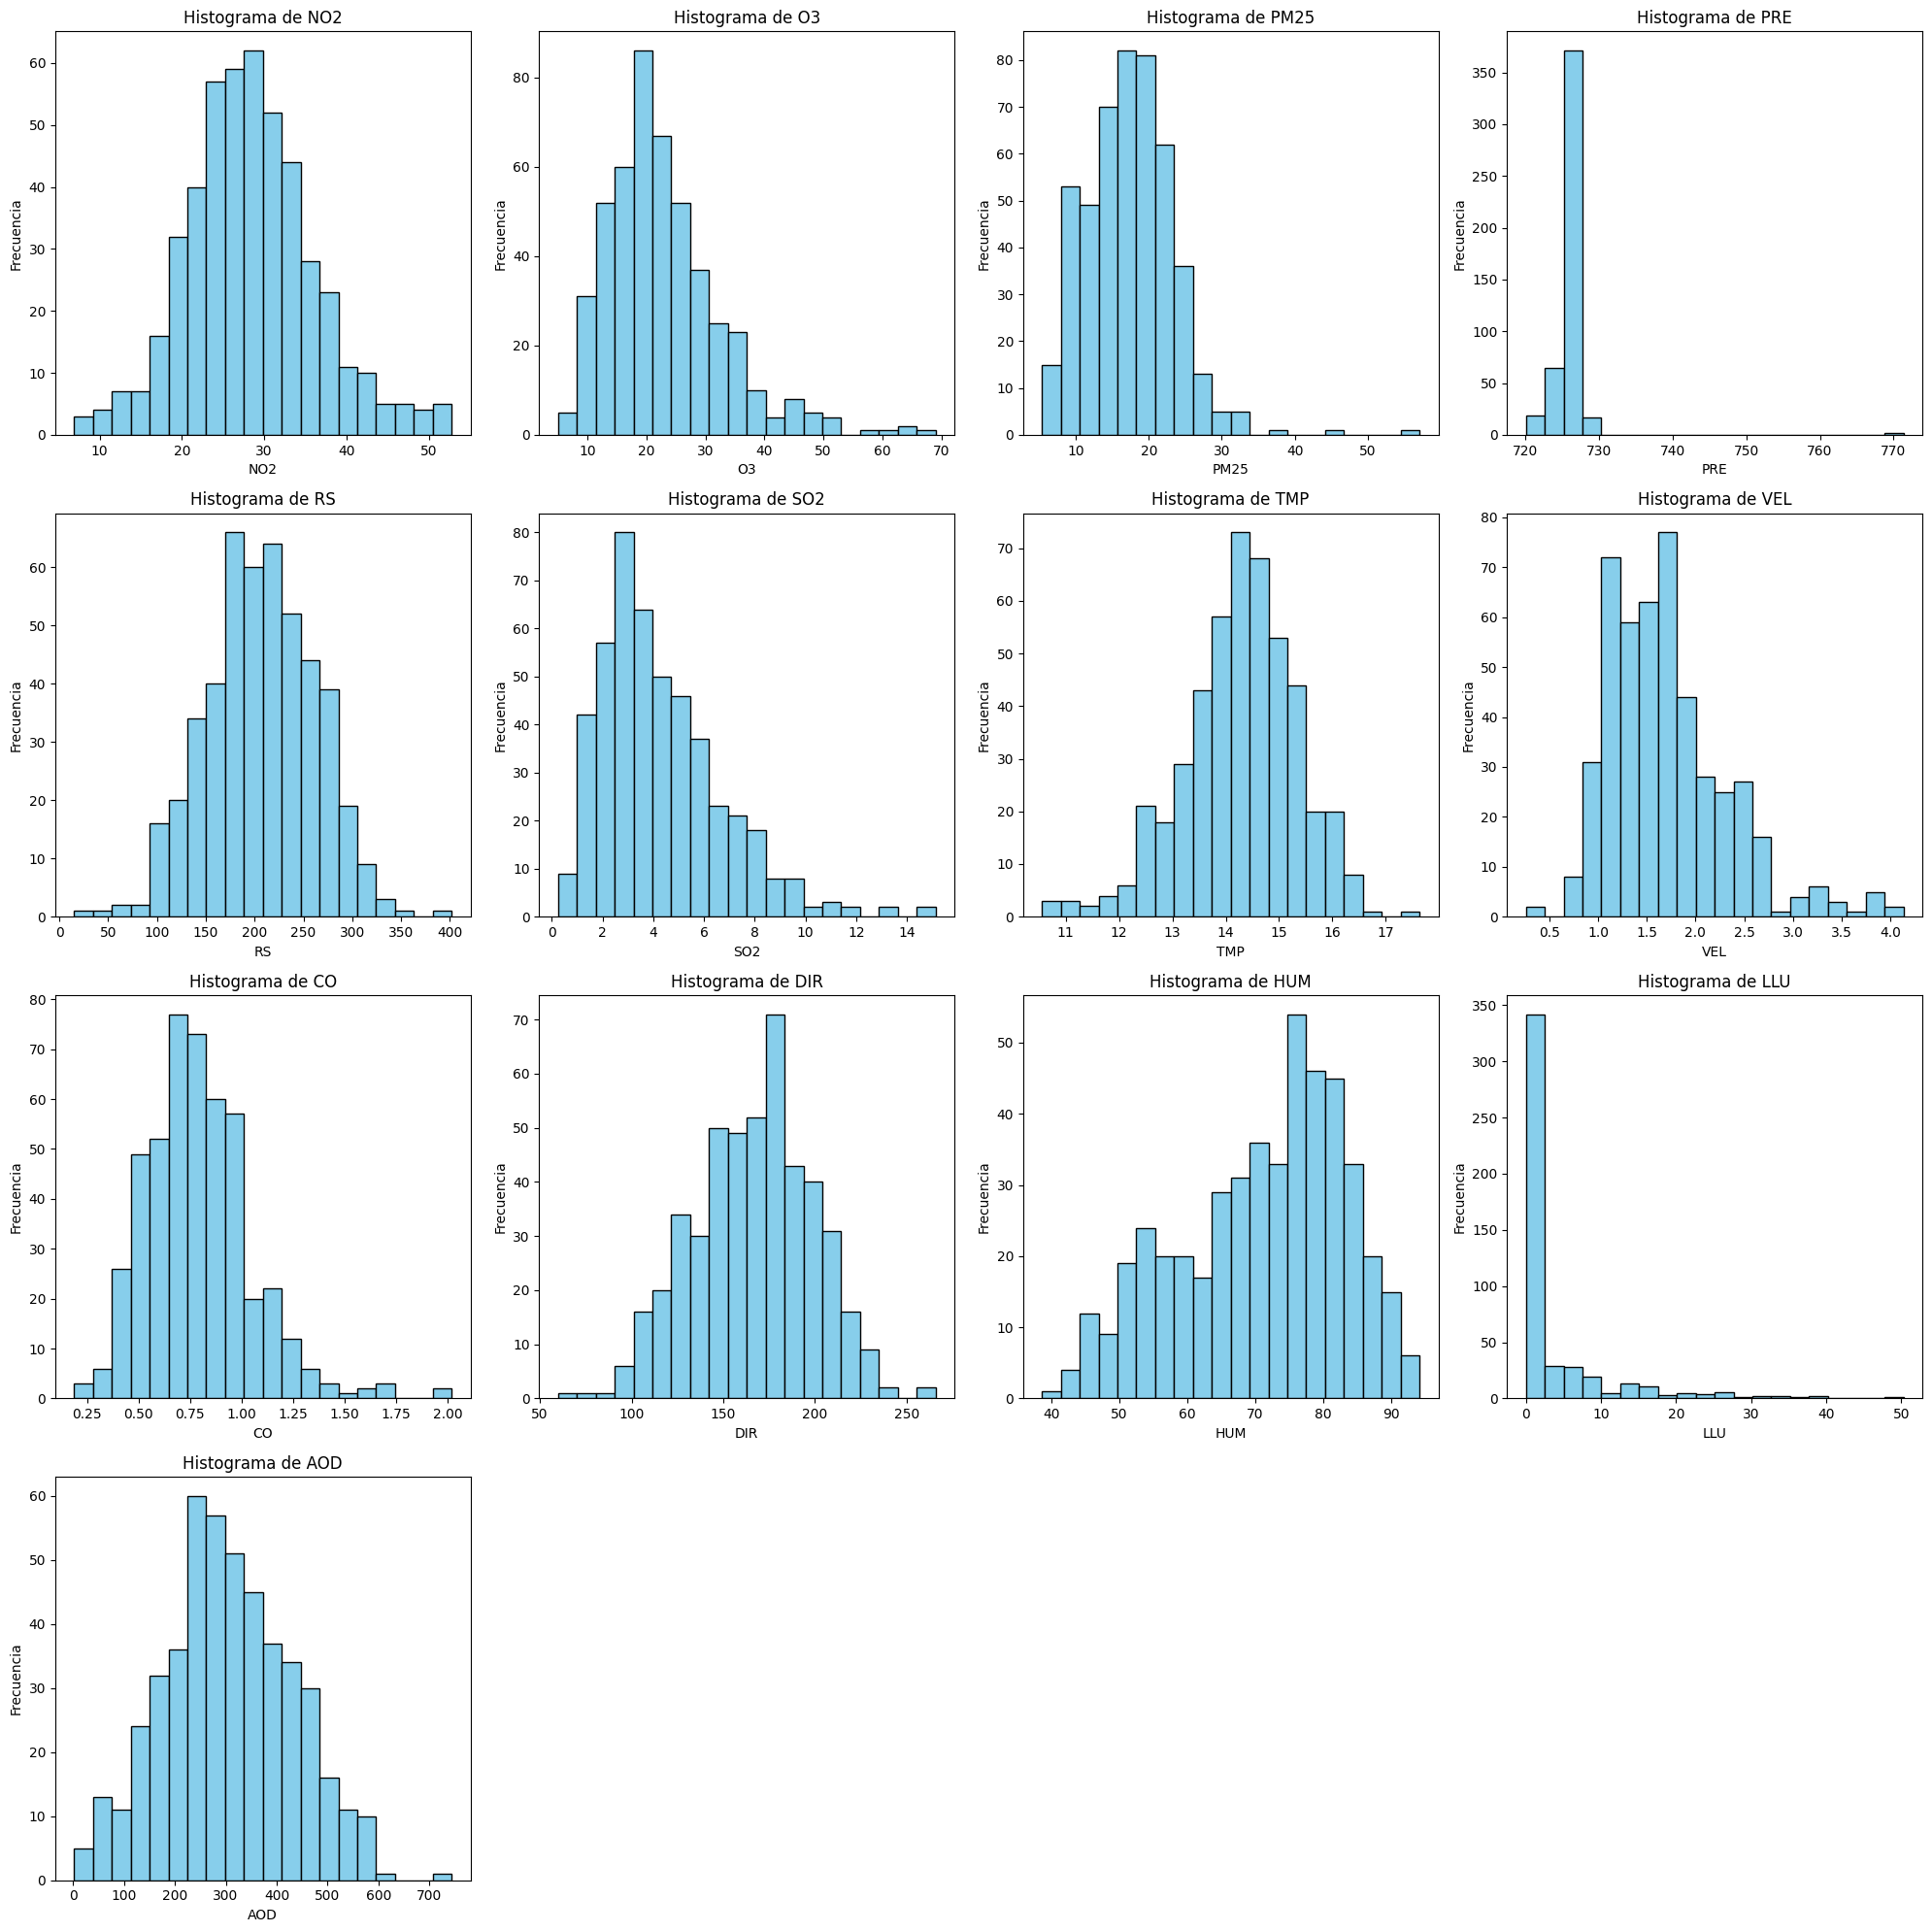

In [219]:
# Configurar el tamaño de la figura y el número de subgráficas
fig, axs = plt.subplots(4, 4, figsize=(20, 20))  # Ajustar el tamaño según sea necesario

# Aplanar el array de ejes para una iteración más fácil
axs = axs.ravel()

# Graficar un histograma para cada columna, hasta un máximo de 16 columnas
for i, column in enumerate(data.columns[:16]):  # Ajusta según el número de columnas
    axs[i].hist(data[column].dropna(), bins=20, color='skyblue', edgecolor='black')
    axs[i].set_title(f'Histograma de {column}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Frecuencia')

# Ocultar gráficos vacíos si hay menos de 16 columnas
for i in range(len(data.columns), 16):
    axs[i].axis('off')

plt.tight_layout()
plt.show()

<a id="section26"></a>
## <font color="#004D7F">2.6. Correlaciones: _corr()_ </font>

In [220]:
# Pairwise Pearson correlations
pd.set_option('display.width', 120)
pd.set_option('display.precision', 4)
correlation = data.corr(method='pearson')
print(correlation)

         NO2      O3    PM25     PRE      RS     SO2     TMP     VEL      CO     DIR     HUM     LLU     AOD
NO2   1.0000 -0.0757  0.6229  0.1098 -0.1390  0.3546 -0.2513 -0.1569  0.6053 -0.0178  0.3422  0.2704  0.1799
O3   -0.0757  1.0000 -0.2015 -0.0179  0.5243 -0.1768  0.3784  0.4154 -0.3264  0.2398 -0.5381 -0.1693  0.0563
PM25  0.6229 -0.2015  1.0000  0.1438 -0.0721  0.3610 -0.2125 -0.1627  0.5502 -0.0906  0.3952  0.1514  0.0882
PRE   0.1098 -0.0179  0.1438  1.0000 -0.0475 -0.0720 -0.1653  0.0482  0.2390 -0.0311  0.1203  0.1796  0.0151
RS   -0.1390  0.5243 -0.0721 -0.0475  1.0000 -0.0306  0.6604  0.4687 -0.2663  0.2861 -0.5676 -0.2840 -0.0022
SO2   0.3546 -0.1768  0.3610 -0.0720 -0.0306  1.0000 -0.0622 -0.1208  0.2859 -0.0485  0.1238 -0.0692  0.0363
TMP  -0.2513  0.3784 -0.2125 -0.1653  0.6604 -0.0622  1.0000  0.3985 -0.3510  0.3398 -0.5761 -0.3469 -0.0437
VEL  -0.1569  0.4154 -0.1627  0.0482  0.4687 -0.1208  0.3985  1.0000 -0.0008  0.3080 -0.5263 -0.2247 -0.0241
CO    0.6053 -0.326

In [192]:
# Spearman correlations
pd.set_option('display.width', 120)
pd.set_option('display.precision', 4)
correlation = data.corr(method='spearman')
print(correlation)

          O3    PM25     PRE      RS     SO2     TMP     VEL     DIR     HUM     LLU     AOD
O3    1.0000  0.0395 -0.0039  0.4545  0.0202  0.3465  0.3517  0.3155 -0.3939 -0.2009  0.0405
PM25  0.0395  1.0000 -0.1037  0.0771  0.3720  0.0120 -0.1139  0.1218  0.0335  0.0122  0.0967
PRE  -0.0039 -0.1037  1.0000 -0.2209  0.0070 -0.2215 -0.1138 -0.0043  0.1824  0.1898 -0.0095
RS    0.4545  0.0771 -0.2209  1.0000  0.1205  0.4985  0.5429  0.3235 -0.3794 -0.2328  0.0228
SO2   0.0202  0.3720  0.0070  0.1205  1.0000  0.0673 -0.1062  0.1872 -0.0833 -0.0738 -0.0003
TMP   0.3465  0.0120 -0.2215  0.4985  0.0673  1.0000  0.5021  0.2234 -0.4894 -0.3110 -0.0103
VEL   0.3517 -0.1139 -0.1138  0.5429 -0.1062  0.5021  1.0000  0.1678 -0.4386 -0.2860  0.0787
DIR   0.3155  0.1218 -0.0043  0.3235  0.1872  0.2234  0.1678  1.0000 -0.4078 -0.2134 -0.0288
HUM  -0.3939  0.0335  0.1824 -0.3794 -0.0833 -0.4894 -0.4386 -0.4078  1.0000  0.6874  0.1570
LLU  -0.2009  0.0122  0.1898 -0.2328 -0.0738 -0.3110 -0.2860 -0.2134  

In [ ]:
# Kendall correlations
pd.set_option('display.width', 120)
pd.set_option('display.precision', 4)
correlation = data.corr(method='kendall')
print(correlation)

         NO2      O3    PM25     PRE      RS     SO2     TMP     VEL      CO     DIR     HUM     LLU     AOD
NO2   1.0000 -0.0172  0.3803  0.0649 -0.0821  0.2454 -0.0832 -0.0090  0.3956  0.0322  0.2490  0.1983  0.1007
O3   -0.0172  1.0000 -0.1130  0.0863  0.3306 -0.1321  0.3198  0.4063 -0.1628  0.2088 -0.3980 -0.2421 -0.0757
PM25  0.3803 -0.1130  1.0000 -0.0330 -0.0388  0.2322 -0.1181  0.0218  0.3636 -0.0124  0.2214  0.1037  0.0842
PRE   0.0649  0.0863 -0.0330  1.0000 -0.0377 -0.0602 -0.1336  0.0839  0.1610  0.0772  0.0382  0.1000 -0.0059
RS   -0.0821  0.3306 -0.0388 -0.0377  1.0000 -0.0568  0.3574  0.2355 -0.1530  0.0907 -0.2504 -0.1994  0.0055
SO2   0.2454 -0.1321  0.2322 -0.0602 -0.0568  1.0000 -0.0934 -0.1026  0.1634 -0.0838  0.0883  0.0478  0.0837
TMP  -0.0832  0.3198 -0.1181 -0.1336  0.3574 -0.0934  1.0000  0.2508 -0.2183  0.1156 -0.3220 -0.1945  0.0177
VEL  -0.0090  0.4063  0.0218  0.0839  0.2355 -0.1026  0.2508  1.0000 -0.0053  0.1050 -0.2816 -0.2399 -0.0537
CO    0.3956 -0.162

<a id="section27"></a>
## <font color="#004D7F">2.7. Asimetría: _skew()_ </font>

Puede calcular el sesgo de cada atributo utilizando la función `skew()`. El resultado de inclinación muestra una inclinación positiva (derecha) o negativa (izquierda). Los valores más cercanos a cero muestran menos sesgo.

In [119]:
# Skew for each attribute
data.skew()

NO2      0.3691
O3       1.3410
PM25     1.0089
PRE     11.2576
RS      -0.0680
SO2      1.1667
TMP     -0.4344
VEL      1.1589
CO       0.9641
DIR     -0.1332
HUM     -0.4496
LLU      2.8496
AOD      0.1446
dtype: float64

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#004D7F"></i> </font></div>